In [55]:
import numpy as np 
import matplotlib.pylab as plt 

# Building Components of K Means Clustring Algorithm 

In [49]:
# data generation
# m: size of points, n:size of features
m = 10
n = 3
np.random.seed(1)
points = np.random.random(size=(m,n))
print(points)

[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]
 [6.70467510e-01 4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01 8.00744569e-01]
 [9.68261576e-01 3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01 8.50442114e-02]
 [3.90547832e-02 1.69830420e-01 8.78142503e-01]]


In [101]:
# cluster size, k
k = 2

distortion_history = []
n_iter = 1
# initialize centroids
np.random.seed(1)
centroids = points[np.random.choice(m, size=k)]
print('centroids: ', centroids, sep='\n')

centroids: 
[[0.67046751 0.4173048  0.55868983]
 [0.87638915 0.89460666 0.08504421]]


In [102]:
# calculate distance between points to the centroids
diff = points - centroids[:, np.newaxis]
# distance: clusters x points
distances = np.linalg.norm(diff, axis=2)
print(distances)

[[0.68415064 0.65284264 0.51558003 0.18260683 0.84368274 0.
  0.62259618 0.34253498 0.70325028 0.74965033]
 [0.49860358 0.94280165 0.93536131 0.83676892 0.67460758 0.70325028
  1.24058281 0.84557713 0.         1.36214329]]


In [103]:
# nearest cluster of each points from k x m
# results => m
cluster_labels = np.argmin(distances, axis=0)
print(cluster_labels)

[1 0 0 0 1 0 0 0 1 0]


In [104]:
# update centroids
# average of each features by clusters
new_centroids = np.array([points[cluster_labels == i].mean(axis=0) for i in range(k)])
print('updated centroids: ', new_centroids, sep='\n')

updated centroids: 
[[0.40651148 0.28716743 0.58631787]
 [0.4992878  0.8310162  0.03751539]]


In [107]:
# performance metrics
# distortion: sum of squrare of all (points - centroid) each cluster

# distortion =
distortion = np.sum([np.sum((points[cluster_labels == i] - new_centroids[i])**2) for i in range(k)])
distortion_history.append(distortion)


In [109]:
# check if convergence
if np.all(centroids == new_centroids):
    print("converged! Stopping ineration!")
    
centroids = new_centroids.copy()

In [110]:
centroids, cluster_labels, distortion_history

(array([[0.40651148, 0.28716743, 0.58631787],
        [0.4992878 , 0.8310162 , 0.03751539]]),
 array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0]),
 [1.4388769617240955])

# K Means Function

In [147]:
def k_means(points, k, max_iter=10, centroids = None):
    """K means clustering 
    from scratch"""
    m, n = points.shape
    distortion_history = []
    # initialize centroids
    if centroids is None:
        np.random.seed(1)
        centroids = points[np.random.choice(m, size=k, replace=False)]

    for _ in range(max_iter):
        # calculate distance between points to the centroids
        diff = points - centroids[:, np.newaxis]

        # distance: clusters x points
        distances = np.linalg.norm(diff, axis=2)

        # nearest cluster of each points from k x m
        # results => m
        cluster_labels = np.argmin(distances, axis=0)

        # update centroids
        # average of each features by clusters
        new_centroids = np.array([points[cluster_labels == cluster].mean(axis=0) for cluster in range(k)])

        # performance metrics
        # distortion: sum of squrare of all (points - centroid) each cluster
        distortion = np.sum([np.sum((points[cluster_labels == cluster] - new_centroids[cluster])**2) for cluster in range(k)])
        distortion_history.append(distortion)

        # check if convergence
        if np.all(centroids == new_centroids):
            print("converged! Stopping ineration!")
            break
            
        centroids = new_centroids.copy()

    return centroids, cluster_labels, distortion_history

In [180]:
np.random.seed(1)
points = np.random.random(size=(100,3))

centroids, cluster_labels, distortion_history = k_means(points, k=2, max_iter=10)

converged! Stopping ineration!


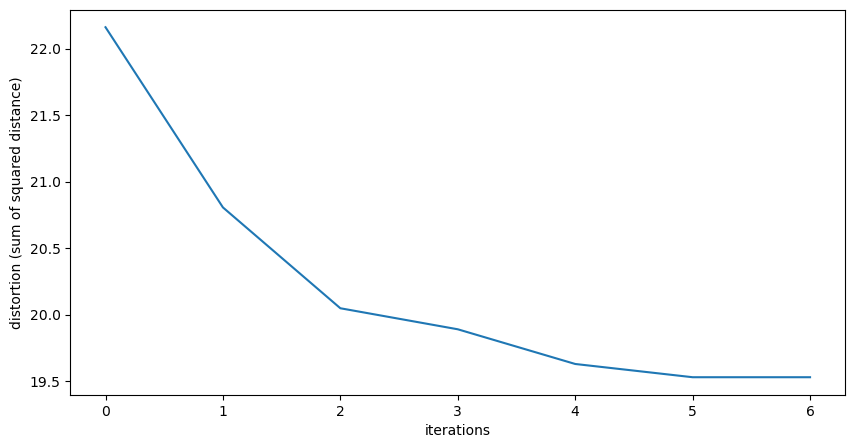

In [181]:
# plotting distortion
plt.figure(figsize=(10, 5))
plt.plot(distortion_history)
plt.xlabel('iterations')
plt.ylabel('distortion (sum of squared distance)')
plt.show()

# Comparing with sklearn results

In [148]:
np.random.seed(1)
points = np.random.random(size=(100,3))

np.random.seed(1)
centroids = points[np.random.choice(m, size=k, replace=False)]
print(centroids)

[[0.18626021 0.34556073 0.39676747]
 [0.03905478 0.16983042 0.8781425 ]]


In [177]:
# my k means
my_km_result = k_means(
    points, k=2, max_iter=10,
    centroids=centroids
    )
print('inertia:', my_km_result[2][-1])

converged! Stopping ineration!
inertia: 18.575117796698184


In [178]:
# sklearn k means
from sklearn.cluster import KMeans
sk_kmeans = KMeans(
    n_clusters=2, 
    init=centroids,
    max_iter=10, # Maximum number of iterations of the k-means algorithm for a single run.
    n_init=1, # Number of times the k-means algorithm is run with different centroid seeds. 
    random_state=0)
sk_kmeans.fit(points)
sk_inertia = sk_kmeans.inertia_
print(sk_inertia)
sk_centroids = sk_kmeans.cluster_centers_
print(sk_centroids)

sk_pred = sk_kmeans.predict(points)

18.575117796698184
[[0.51976094 0.80122477 0.44939357]
 [0.41001965 0.26703673 0.56082004]]


Text(0.5, 1.0, 'SKlearn K Means')

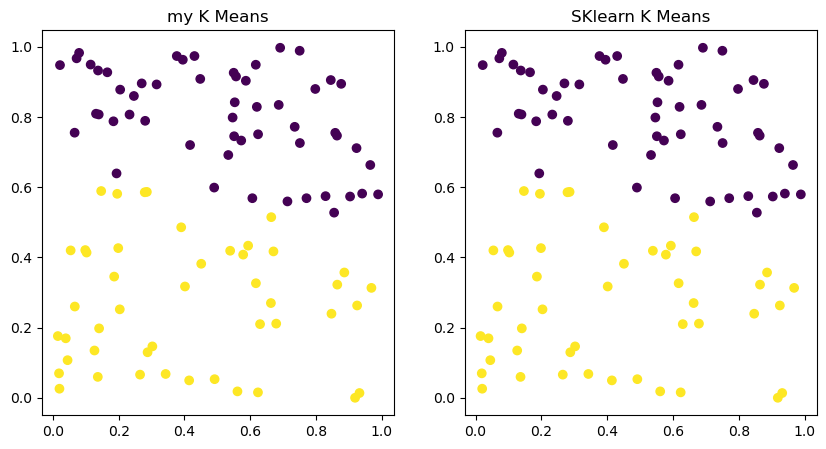

In [179]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(points[:,0], points[:,1],
            c=my_km_result[1])
plt.title('my K Means')
plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1], 
            c=sk_pred)
plt.title('SKlearn K Means')